# Подбор коров при помощи моделей машинного обучения

Владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада, и для этого он заключил контракт с ассоциацией пастбищ «ЭкоФерма».

Нашу IT-компанию наняли помочь фермеру с подбором подходящих коров, используя модели машинного обучения. Главные критерии фермера - коровы должны давать не менее 6000 килограммов молока в год, а надой был вкусным - строго по его критериям.

Перед нами стоят задачи разработать 2 прогнозные модели:
- Первая будет прогнозировать возможный удой коровы (Целевой признак `Удой`)
- Вторая будет рассчитывать вероятность получить вкусное молоко от коровы (Целевой признак `Вкус молока`)

На основе прогнозов этих двух моделей будут приниматься решения о покупке той или иной коровы.

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Числовые-данные" data-toc-modified-id="Числовые-данные-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Числовые данные</a></span></li><li><span><a href="#Нечисловые-данные" data-toc-modified-id="Нечисловые-данные-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Нечисловые данные</a></span></li></ul></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Обучение-модели-линейной-регрессии" data-toc-modified-id="Обучение-модели-линейной-регрессии-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение модели линейной регрессии</a></span><ul class="toc-item"><li><span><a href="#Первая-модель-прогнозирования-удоя" data-toc-modified-id="Первая-модель-прогнозирования-удоя-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Первая модель прогнозирования удоя</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-и-оценка-качества" data-toc-modified-id="Обучение-и-оценка-качества-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Обучение и оценка качества</a></span></li></ul></li><li><span><a href="#Вторая-модель-прогнозирования-удоя" data-toc-modified-id="Вторая-модель-прогнозирования-удоя-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Вторая модель прогнозирования удоя</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-и-оценка-качества" data-toc-modified-id="Обучение-и-оценка-качества-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Обучение и оценка качества</a></span></li></ul></li><li><span><a href="#Третья-модель-прогнозирования-удоя" data-toc-modified-id="Третья-модель-прогнозирования-удоя-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Третья модель прогнозирования удоя</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-и-оценка-качества" data-toc-modified-id="Обучение-и-оценка-качества-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Обучение и оценка качества</a></span></li></ul></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Прогнозирование-целевого-признака" data-toc-modified-id="Прогнозирование-целевого-признака-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Прогнозирование целевого признака</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Прогнозирование" data-toc-modified-id="Прогнозирование-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Прогнозирование</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-модели-логистической-регрессии" data-toc-modified-id="Обучение-модели-логистической-регрессии-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение модели логистической регрессии</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-и-оценка-качества" data-toc-modified-id="Обучение-и-оценка-качества-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Обучение и оценка качества</a></span></li><li><span><a href="#Поиск-порога-классификации" data-toc-modified-id="Поиск-порога-классификации-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Поиск порога классификации</a></span></li><li><span><a href="#Прогнозирование-целевого-признака" data-toc-modified-id="Прогнозирование-целевого-признака-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Прогнозирование целевого признака</a></span></li></ul></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоговые выводы</a></span></li></ul></div>

**Описание данных**

1. `ferma_main.csv` содержит данные о стаде фермера на текущий момент.
 - id — уникальный идентификатор коровы.
 - Удой, кг — масса молока, которую корова даёт в год (в килограммах).
 - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
 - Сырой протеин, г — содержание сырого протеина в корме (в граммах).
 - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
 - Порода — порода коровы.
 - Тип пастбища — ландшафт лугов, на которых паслась корова.
 - порода папы_быка — порода папы коровы.
 - Жирность,% — содержание жиров в молоке (в процентах).
 - Белок,% — содержание белков в молоке (в процентах).
 - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


2. `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. 
 - id — уникальный идентификатор коровы.
 - Имя Папы — имя папы коровы.


3. `cow_buy.csv` это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.
 - Порода — порода коровы.
 - Тип пастбища — ландшафт лугов, на которых паслась корова.
 - порода папы_быка — порода папы коровы.
 - Имя_папы — имя папы коровы.
 - Текущая_жирность,% — содержание жиров в молоке (в процентах).
 - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [1]:
import pandas as pd    # Импорт необходимых библиотек
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
try:
    import phik
except:
    phik_loc = False
else:
    phik_loc = True

In [2]:
pd.options.mode.chained_assignment = None # Выключаем отображение некритичных предупреждений
sns.set(font_scale=1) # Выставляем модификатор размерности графиков

## Загрузка данных

In [3]:
def dataset_info(ds, info=True): # Универсальная функция презентации данных
    print('Количество дубликатов:', ds.duplicated().sum())
    print('Длина датасета:', len(ds))
    display(ds.head())
    if info: 
        ds.info()
        display(ds.describe())

Для начала загрузим и ознакомимся со всеми данными.

In [4]:
try:  # Загрузка датасета с информацией о текущем стаде фермера
    ds_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
except:
    ds_main = pd.read_csv('datasets/ferma_main.csv', sep=';')
dataset_info(ds_main)

Количество дубликатов: 5
Длина датасета: 634


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

,id,"Удой, кг","Сырой протеин, г"
count,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,1922.682965
std,183.096982,1638.401021,182.392548
min,1.000000,5204.000000,1660.000000
25%,159.250000,5751.750000,1772.250000
50%,317.500000,6130.500000,1880.500000
75%,475.750000,6501.000000,2058.750000
max,629.000000,45616.000000,2349.000000


In [5]:
try:  # Загрузка датасета с информацией об отце каждой коровы в стаде фермера
    ds_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
except:
    ds_dad = pd.read_csv('datasets/ferma_dad.csv', sep=';')
dataset_info(ds_dad, False)
ds_dad.info()

Количество дубликатов: 0
Длина датасета: 629


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [6]:
try: # Загрузка датасета с коровами, которых фермер хочет купить
    ds_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    ds_buy = pd.read_csv('datasets/cow_buy.csv', sep=';')
dataset_info(ds_buy)

Количество дубликатов: 4
Длина датасета: 20


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,4","3,074",более_2_лет
freq,11,11,12,8,3,5,15


Сразу переименуем все столбцы в более удобный для использования формат

In [7]:
ds_main.columns = ['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'пастбище', 'порода_пб', 'жирность', 'белок', 'вкус', 'возраст']
ds_main.columns # Переименование столбцов. Вручную приводим к нижнему регистру и упрощаем названия для быстрого доступа при работе с данными

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'пастбище',
       'порода_пб', 'жирность', 'белок', 'вкус', 'возраст'],
      dtype='object')

In [8]:
ds_dad.columns = ['id', 'имя_папы']
ds_dad.columns

Index(['id', 'имя_папы'], dtype='object')

In [9]:
ds_buy.columns = ['порода', 'пастбище', 'порода_пб', 'имя_папы', 'жирность', 'белок', 'возраст']
ds_buy.columns

Index(['порода', 'пастбище', 'порода_пб', 'имя_папы', 'жирность', 'белок',
       'возраст'],
      dtype='object')

Пропусков нигде нет, зато есть несколько полных дубликатов в данных, а также неверно определены некоторые численные переменные. Разберёмся со всем этим на этапе предобработки.

##  Предобработка данных

Начнём с дубликатов. Датасет `ds_main` содержит в себе 5 полных дубликатов (Включая уникальный id), их можно сразу удалить.

In [10]:
ds_main = ds_main.drop_duplicates() # Сброс полных дубликатов и проверка
ds_main.duplicated().sum()

0

Теперь мы можем совместить датасеты `ds_main` и `ds_dad`, чтобы не работать с большим количеством маленьких датасетов

In [11]:
ds_main = ds_main.merge(ds_dad, on='id') # Объединение ds_main и ds_dad по id
dataset_info(ds_main, False)

Количество дубликатов: 0
Длина датасета: 629


,id,удой,эке,протеин,спо,порода,пастбище,порода_пб,жирность,белок,вкус,возраст,имя_папы
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет,Буйный
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет,Соловчик
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет,Барин
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет,Буйный
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет,Барин


На дубликаты датасета `ds_buy` лучше посмотрим поближе. В нём гораздо меньше записей, а также отсутствует уникальный идентификатор. Не хотелось-бы избавляться от коров, которые просто очень похожи друг на друга.

In [12]:
ds_buy[ds_buy.duplicated(keep=False)] # Вывод всех дублирующихся записей

,порода,пастбище,порода_пб,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Совпадение в породе, типе пастбища и имени папы ещё можно счесть за совпадение, но идентичная жирность и содержание белка в молоке уже можно назвать закономерностью. Тем не менее, эти данные не будут использоваться при обучении модели, а лишние 4 предсказания модель не сломают. Оставим дубликаты исключительно на случай, если это в действительности удивительное совпадение.

Теперь типы данных. Некоторые числовые сведения в обоих датасетах сохранились в виде строк. Преобразуем их в численный тип.

In [13]:
for i in ['жирность', 'белок', 'эке', 'спо']: # Для каждого столбца из списка, все запятые меняются на точки, строки переводятся в числовой тип данных
    ds_main[i] = pd.to_numeric(ds_main[i].replace(',', '.', regex=True))
dataset_info(ds_main)

Количество дубликатов: 0
Длина датасета: 629


,id,удой,эке,протеин,спо,порода,пастбище,порода_пб,жирность,белок,вкус,возраст,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         629 non-null    int64  
 1   удой       629 non-null    int64  
 2   эке        629 non-null    float64
 3   протеин    629 non-null    int64  
 4   спо        629 non-null    float64
 5   порода     629 non-null    object 
 6   пастбище   629 non-null    object 
 7   порода_пб  629 non-null    object 
 8   жирность   629 non-null    float64
 9   белок      629 non-null    float64
 10  вкус       629 non-null    object 
 11  возраст    629 non-null    object 
 12  имя_папы   629 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 68.8+ KB


,id,удой,эке,протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [14]:
for i in ['жирность', 'белок']: # Для каждого столбца из списка, все запятые меняются на точки, строки переводятся в числовой тип данных
    ds_buy[i] = pd.to_numeric(ds_buy[i].replace(',', '.', regex=True))
dataset_info(ds_buy)

Количество дубликатов: 4
Длина датасета: 20


,порода,пастбище,порода_пб,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   порода     20 non-null     object 
 1   пастбище   20 non-null     object 
 2   порода_пб  20 non-null     object 
 3   имя_папы   20 non-null     object 
 4   жирность   20 non-null     float64
 5   белок      20 non-null     float64
 6   возраст    20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,жирность,белок
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


Теперь все типы данных в порядке, пропусков нет, опасные дубликаты удалены. На этом предобработку данных можно заканчивать.

## Исследовательский анализ данных

Для начала разделим все столбцы датасета с текущим стадом на строковые и числовые. Так будет проще создавать правильные графики для каждого столбца.

In [15]:
ds_main_numeric = [] # Список названий столбцов с числовыми данными
ds_main_string = [] # Список названий столбцов со строковыми данными
for i in ds_main.columns:
    if ds_main[i].dtype == 'O':
        ds_main_string.append(i)
    elif i != 'id':
        ds_main_numeric.append(i)
print(ds_main_string, ds_main_numeric)

['порода', 'пастбище', 'порода_пб', 'вкус', 'возраст', 'имя_папы'] ['удой', 'эке', 'протеин', 'спо', 'жирность', 'белок']


### Числовые данные

Теперь построим гистограммы для всех числовых столбцов.

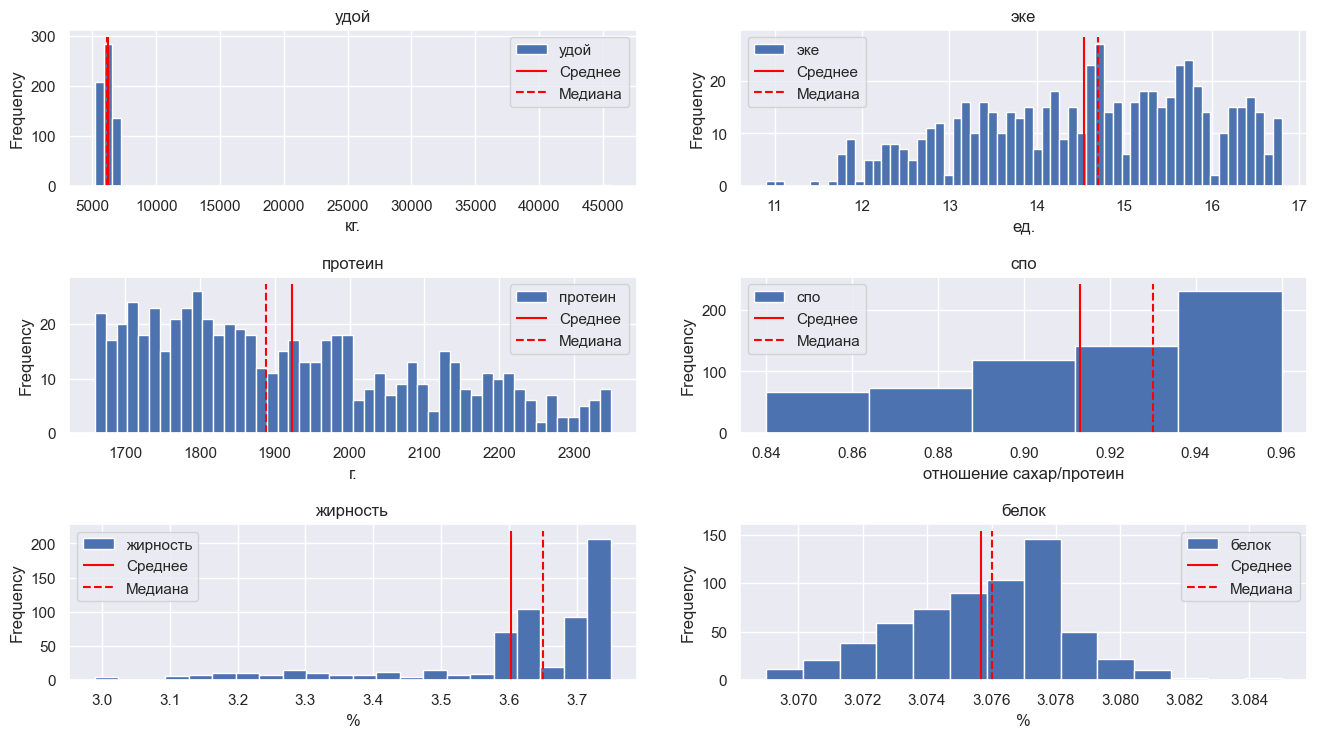

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8)) # Получение расположения сабплотов
fig.tight_layout(pad=3.5) # Расстояние между графиками
bins_list = [60, 58, 48, 5, 22, 14] # Список показателей bins для каждого графика
label_list = ['кг.', 'ед.', 'г.', 'отношение сахар/протеин', '%', '%']
for i in range(len(ds_main_numeric)): # Вывод гистограммы для каждого числового показателя в данных
    bins = ds_main[ds_main_numeric[i]].plot(kind='hist', ax=axes[i//2, i%2], title=ds_main_numeric[i], bins=bins_list[i])
    axes[i//2, i%2].set_xlabel(label_list[i])
    ymin, ymax = axes[i//2, i%2].get_ylim()
    axes[i//2, i%2].vlines(x=ds_main[ds_main_numeric[i]].mean(), colors='red', ymin=ymin, ymax=ymax, label='Среднее')
    axes[i//2, i%2].vlines(x=ds_main[ds_main_numeric[i]].median(), colors='red', ymin=ymin, ymax=ymax, linestyles='--', label='Медиана')
    axes[i//2, i%2].legend()
plt.show()

В значения удоя явно закралась аномалия, вся масса значений перекошена влево, а значения продолжаются вплоть до 45 тысяч. ЭКЕ и СПО имеют небольшой сдвиг вправо, содержание протеина-же наоборот скошено влево. Жирность имеет за собой длинный след из малого количество значений и сильно скошена вправо.

45 тысяч килограмм удоя в год выглядят не слишком-то реалистично. Выведем все записи со значением удоя выше 10000.

In [17]:
ds_main[ds_main['удой']>10000]

,id,удой,эке,протеин,спо,порода,пастбище,порода_пб,жирность,белок,вкус,возраст,имя_папы
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиалл,3.22,3.076,вкусно,более_2_лет,Буйный


Наверняка эта корова мировой рекордсмен, обеспечивающая только своим удоем небольшой город. Либо это простая ошибка в данных. В любом случае, в рамках обучения модели она нам будет мешать. Попрощаемся с чемпионом и продолжим двигаться дальше.

In [18]:
ds_main = ds_main[ds_main['удой']<10000]
ds_main[ds_main['id'] == 17]

,id,удой,эке,протеин,спо,порода,пастбище,порода_пб,жирность,белок,вкус,возраст,имя_папы


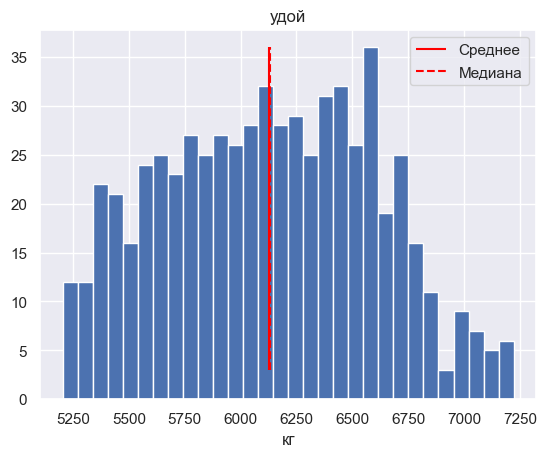

In [19]:
bins = plt.hist(ds_main['удой'], bins=30)
plt.vlines(x=ds_main['удой'].mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=ds_main['удой'].median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.title('удой')
plt.xlabel('кг')
plt.legend();

Теперь распределение похоже на нормальное

Посмотрим на распределение аномальных значений при помощи диаграммы размаха.

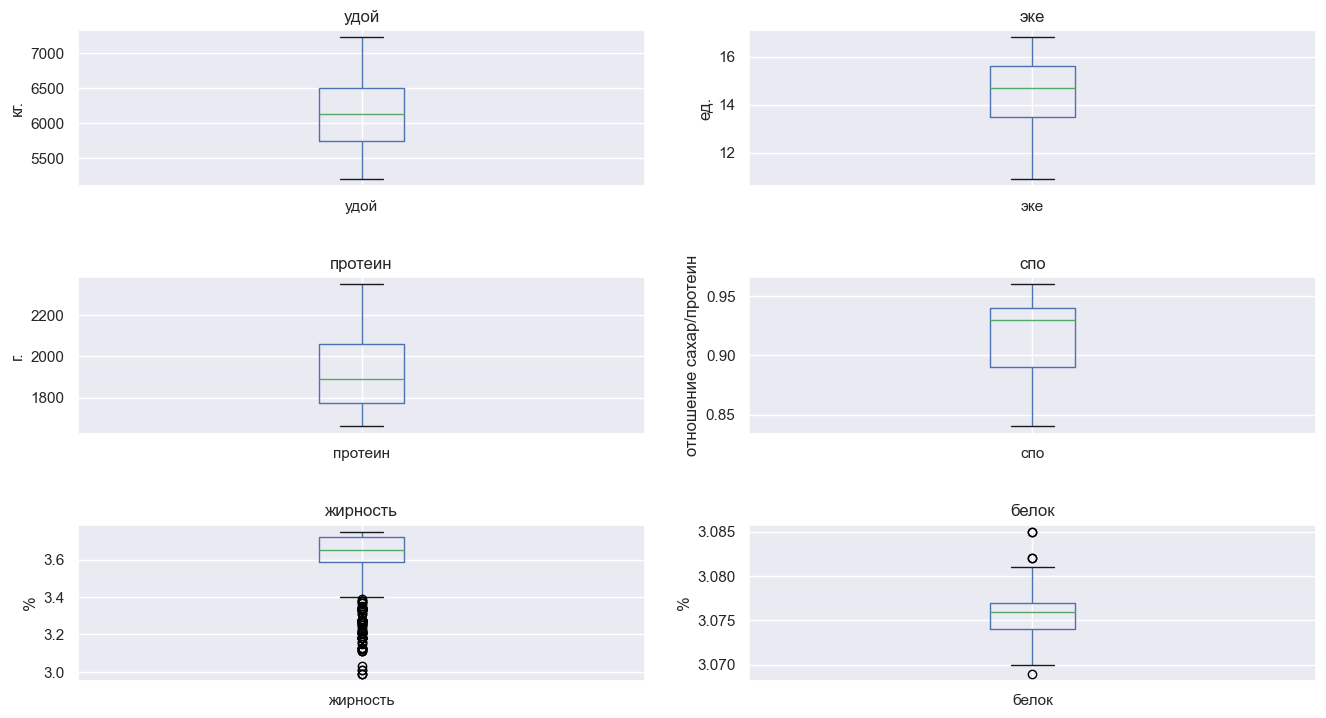

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8)) # Получение расположения сабплотов
fig.tight_layout(pad=3.5) # Расстояние между графиками
label_list = ['кг.', 'ед.', 'г.', 'отношение сахар/протеин', '%', '%']
for i in range(len(ds_main_numeric)): # Создание графика для каждого численного показателя в данных
    ds_main[ds_main_numeric[i]].plot(kind='box', ax=axes[i//2, i%2], title=ds_main_numeric[i], grid=True)
    axes[i//2, i%2].set_ylabel(label_list[i])

Крайне редкие аномальные значения с обеих сторон от медианы у белка, и огромное количество аномально низких значений жирности молока. Однако они не настолько сильно выбиваются из общего списка значений, поэтому оставим аномалии нетронутыми. Все остальные показатели полностью лишены аномальных значений. 

### Нечисловые данные

Теперь разберёмся с нечисловыми данными. Для начала посмотрим на все значения которые они принимают

In [21]:
for i in ds_main_string:
    display(ds_main[i].value_counts()) # Вывод уникальных значений

Вис Бик Айдиал     372
РефлешнСоверинг    256
Name: порода, dtype: int64

Холмистое    350
Равнинное    253
Равнинные     25
Name: пастбище, dtype: int64

Соверин    311
Айдиал     240
Айдиалл     77
Name: порода_пб, dtype: int64

вкусно       370
не вкусно    258
Name: вкус, dtype: int64

более_2_лет    518
менее_2_лет    110
Name: возраст, dtype: int64

Барин       240
Буйный      214
Соловчик    110
Геркулес     64
Name: имя_папы, dtype: int64

Видны неявные дубликаты у типа пастбищ и породы папы-быка - Равнинные и равнинное, Айдиалл и Айдиал. Заменим всё на более популярные значения.

In [22]:
ds_main.loc[ds_main['пастбище'] == 'Равнинные', 'пастбище'] = 'Равнинное'
ds_main['пастбище'].value_counts()

Холмистое    350
Равнинное    278
Name: пастбище, dtype: int64

In [23]:
ds_main.loc[ds_main['порода_пб'] == 'Айдиалл', 'порода_пб'] = 'Айдиал'
ds_main['порода_пб'].value_counts()

Айдиал     317
Соверин    311
Name: порода_пб, dtype: int64

Теперь переведём значения показателей в более удобный для чтения вид.

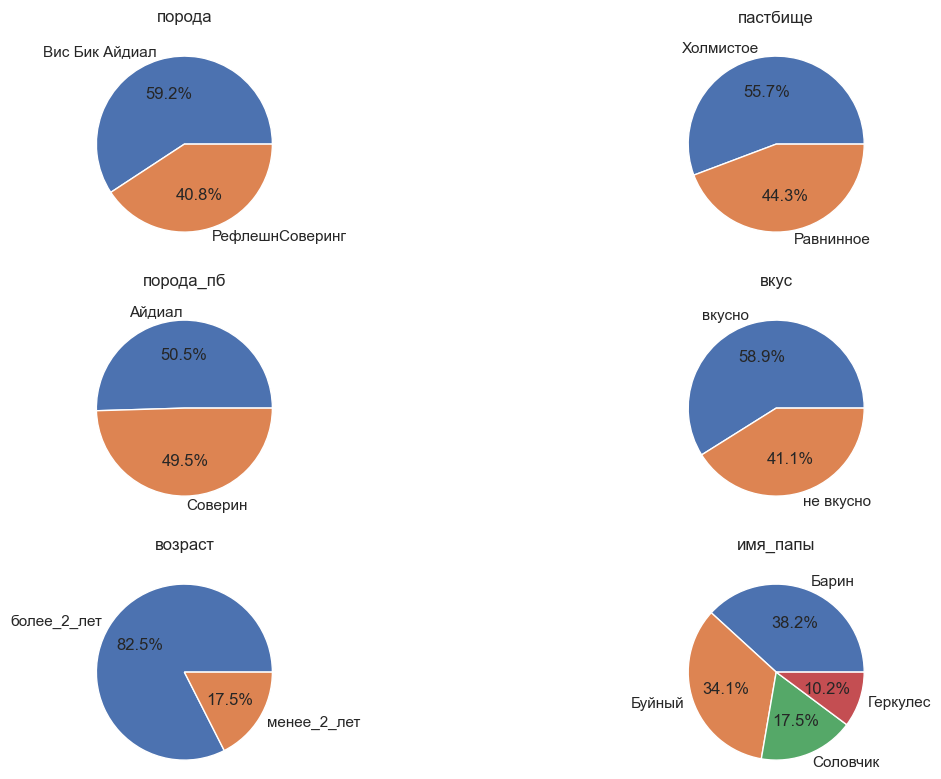

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
plt.subplots_adjust(hspace=2)
for i in range(len(ds_main_string)):
    ds_main[ds_main_string[i]].value_counts().plot(kind='pie', ax=axes[i//2, i%2], radius=2.5, autopct='%.1f%%')
    axes[i//2, i%2].set_title(ds_main_string[i], y=1.8)

Распределение значений выглядит нормально. Самая большая разница между значениями у возраста коров - оно и не удивительно, коровы живут гораздо дольше, чем четыре года.

Итого в рамках исследовательского анализа мы разобрали разные типы значений на соответствующих графиках, избавились от аномалий и неявных дубликатов.

## Корреляционный анализ

Начнём с матрицы корреляции.

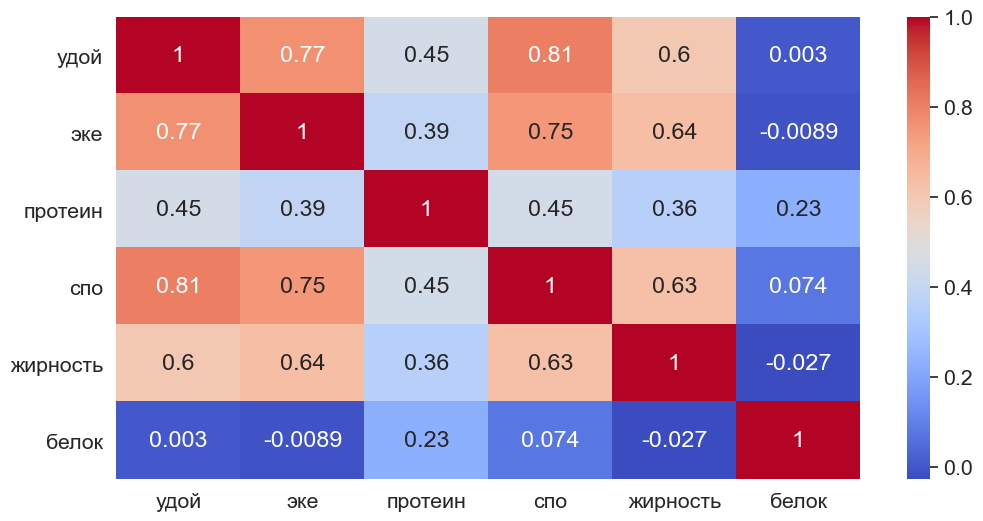

In [25]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.4)
sns.heatmap(ds_main[ds_main_numeric].corr(), annot=True, cmap='coolwarm');
sns.set(font_scale=1)

У нас имеется сильная корреляционная связь между удоем и: 
- энергетической кормовой единицей, 
- соотношением протеина и сахара в корме,
- жирностью молока.

Также удой средне коррелирует с содержанием протеина в молоке, а вот с содержанием белка связь около-нулевая. При этом признаки коррелируют и между собой, но линейной зависимости ни у одного признака нет.

Удой крайне сильно взаимосвязан с СПО и ЭКЕ


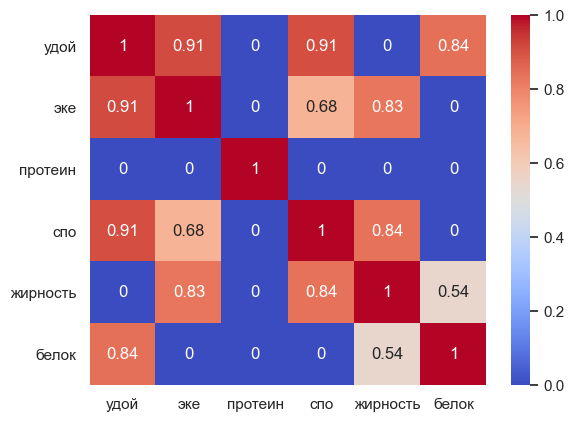

In [26]:
if phik_loc:
    sns.heatmap(ds_main[ds_main_numeric].phik_matrix('удой'), annot=True, cmap='coolwarm');
    print('Удой крайне сильно взаимосвязан с СПО и ЭКЕ')
else:
    print('Тут должны были быть коэффициенты взаимосвязи, но библиотеку phik забыли установить')

Теперь можем перейти к менее числовым признакам. Это будет потруднее, чем создание матрицы корреляции, но мы справимся. Для начала создадим функцию, которая будет использоваться в будущем цикле перебора параметров.

In [27]:
def scatter_plot_display(data, x, y, z, ax): # Функция для вывода шести матриц рассеяния для удоя, одного количественного признака и шести категориальных
    sns.scatterplot(data=data, x=x, y=y, hue=z, ax=ax)
    ax.set_title(f'зависимость удоя от {data[y].name} и {data[z].name}')
    ax.set_xlabel('удой')
    ax.set_ylabel(data[y].name)
    ax.legend()

А теперь морально готовимся к тонне информации. Мы переберём все числовые значения и расположим их на графиках рассеяния, проверяя зависимость от удоя. При этом к каждому полученному графику мы добавим отображение каждого категориального признака цветовой индикацией точек. Это всего-то 5*6=30 графиков.

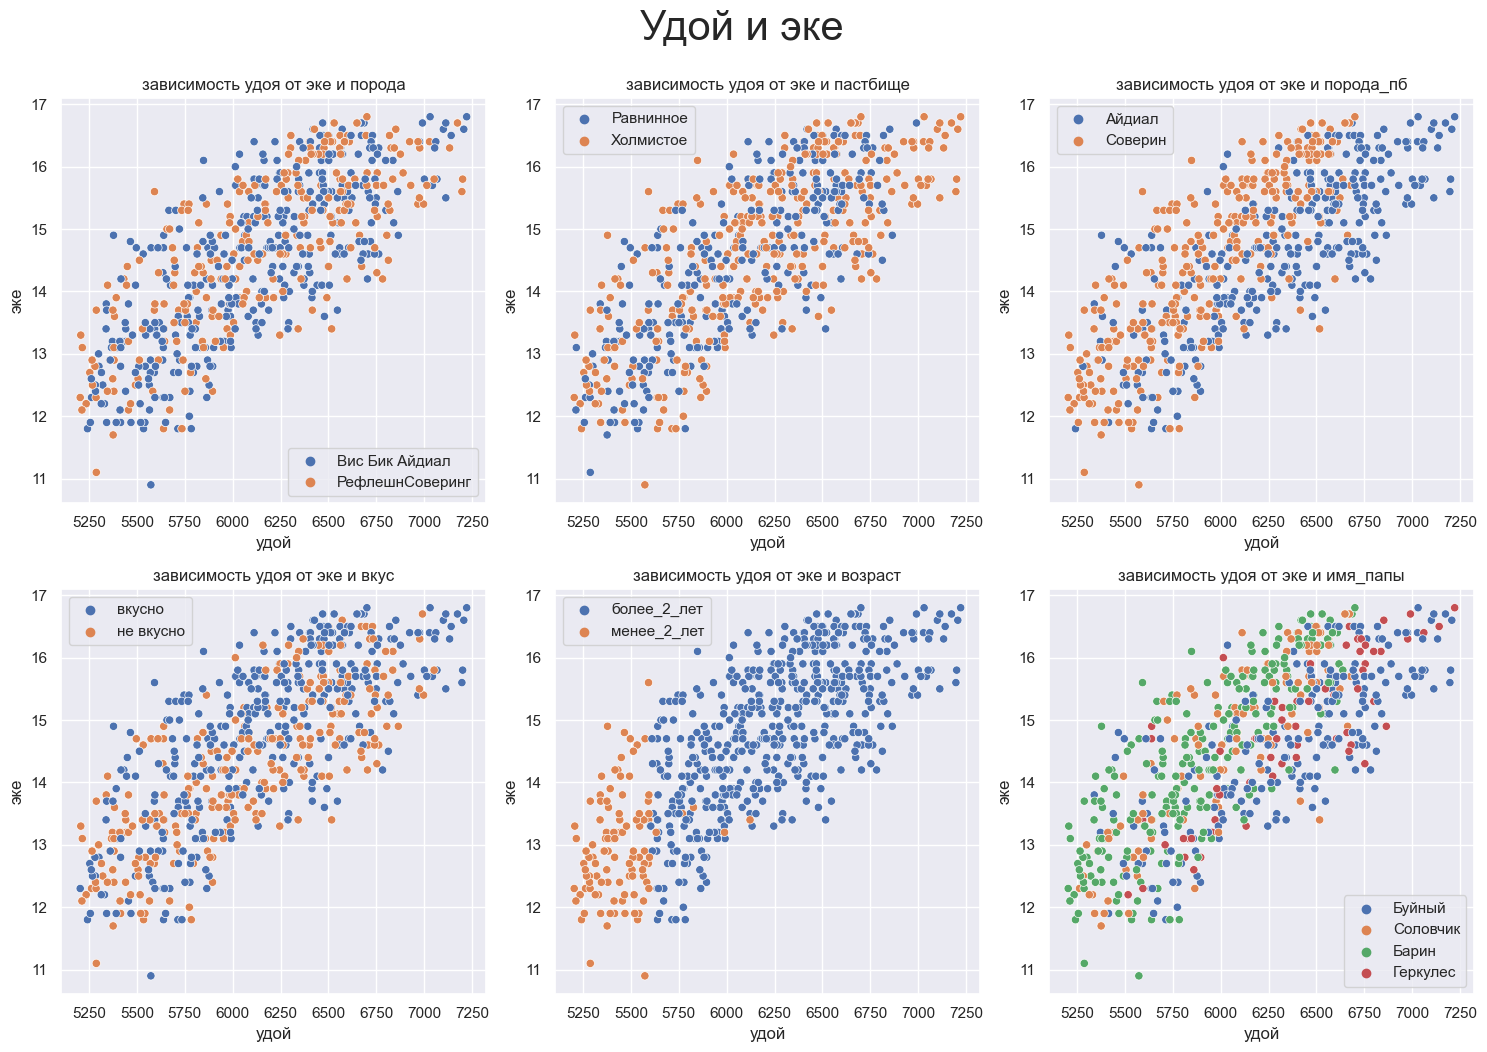

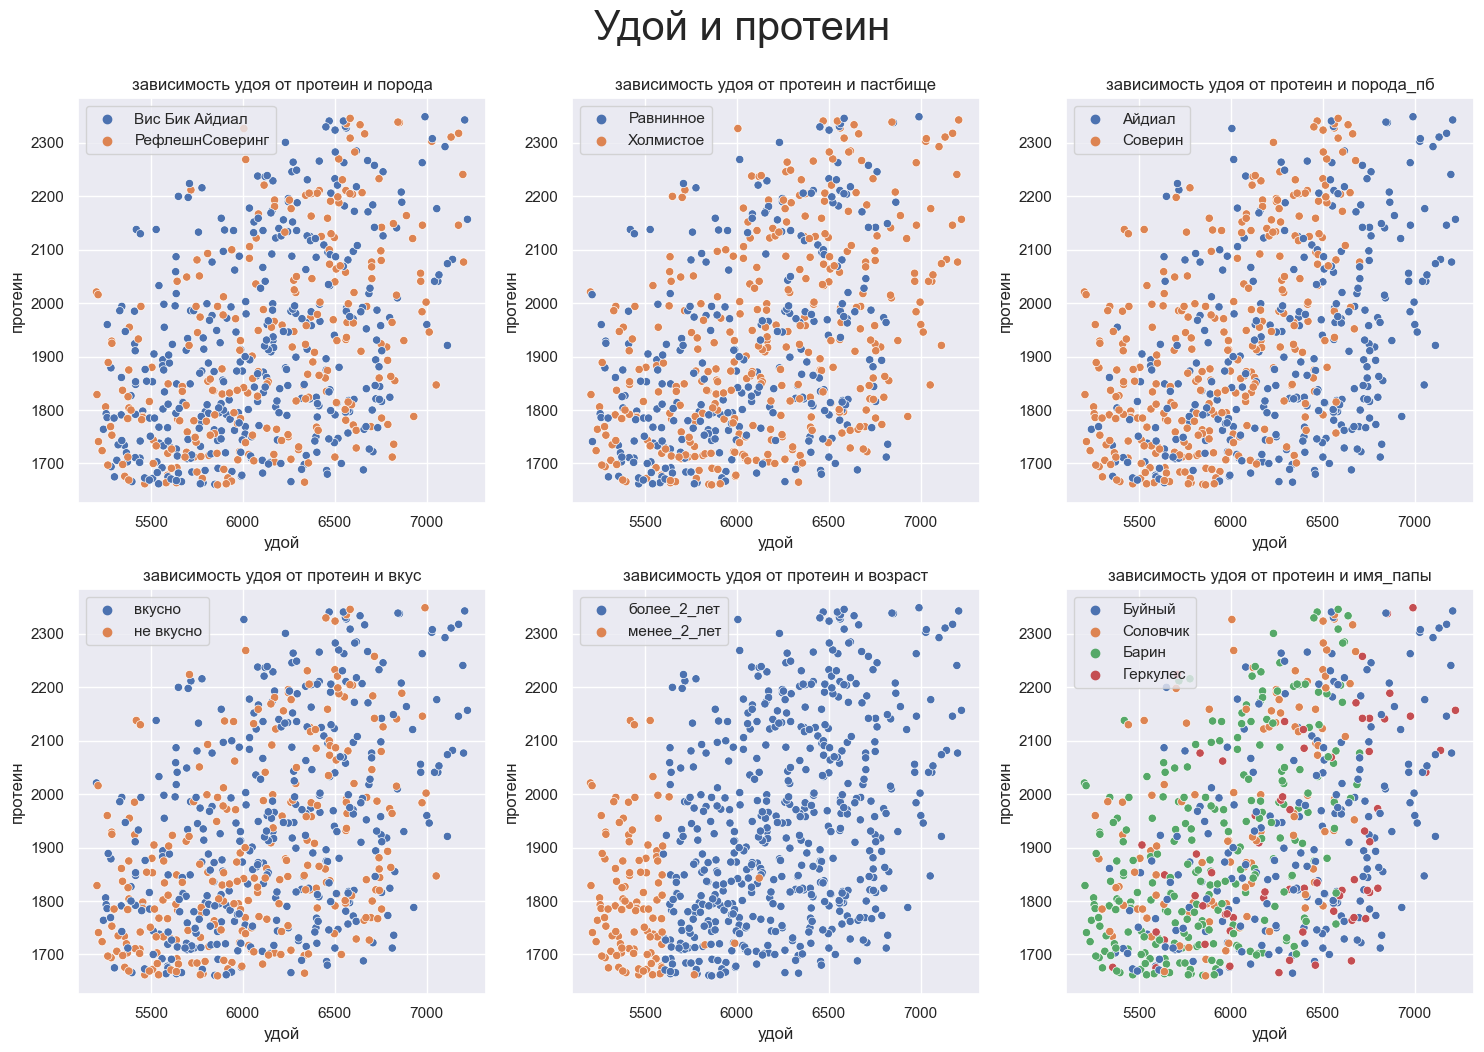

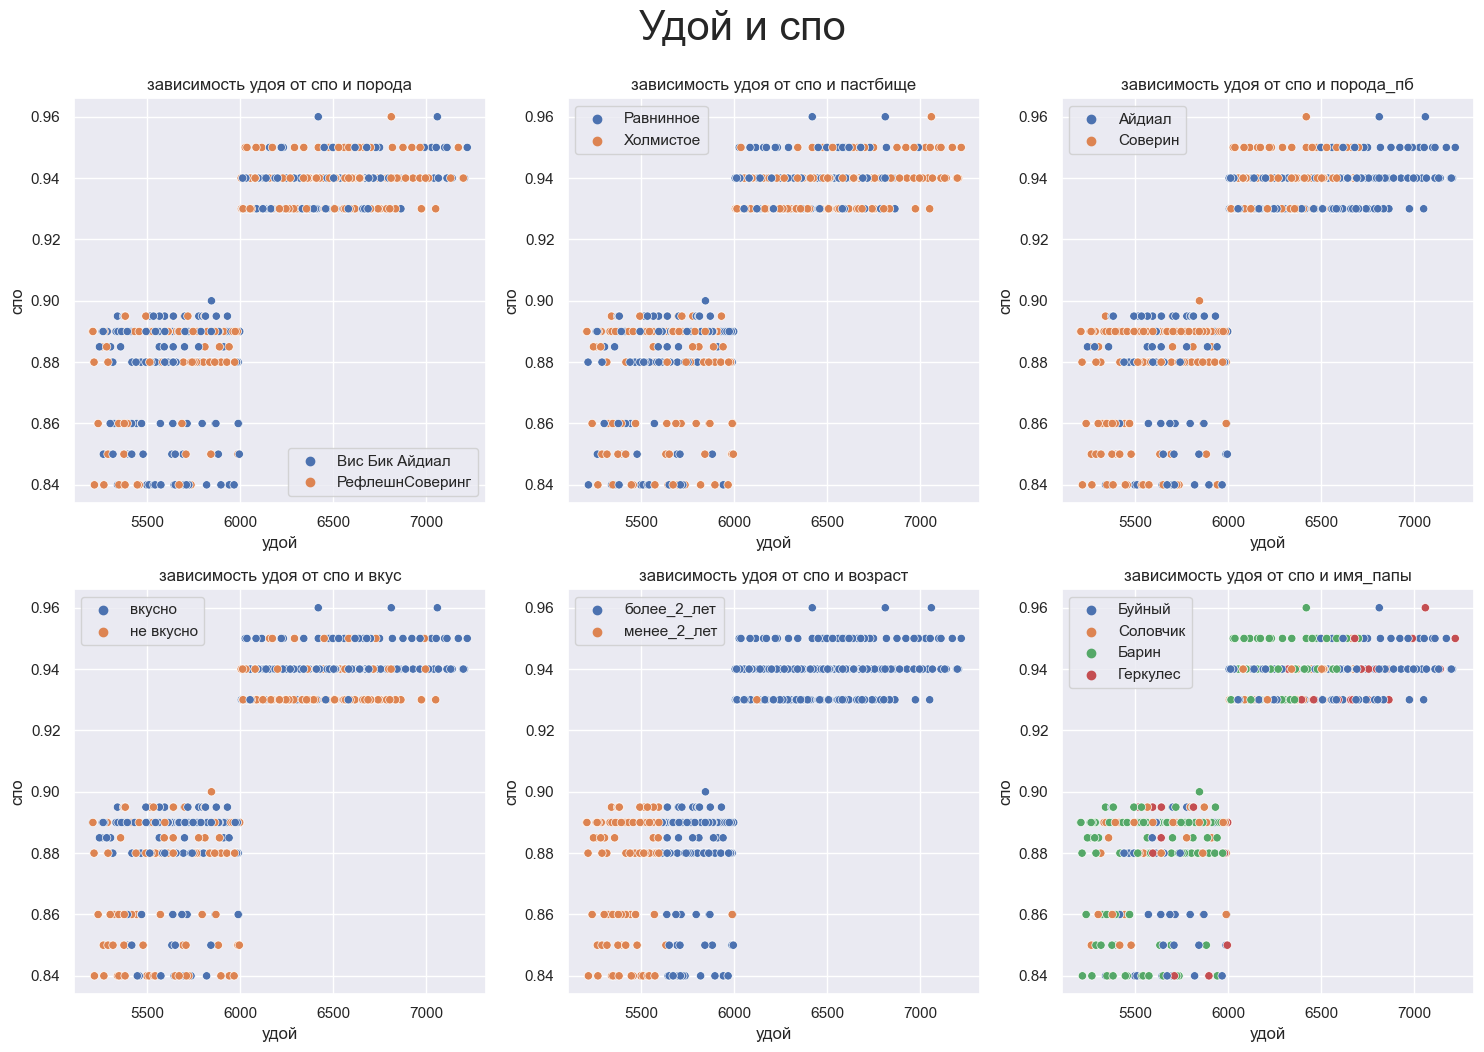

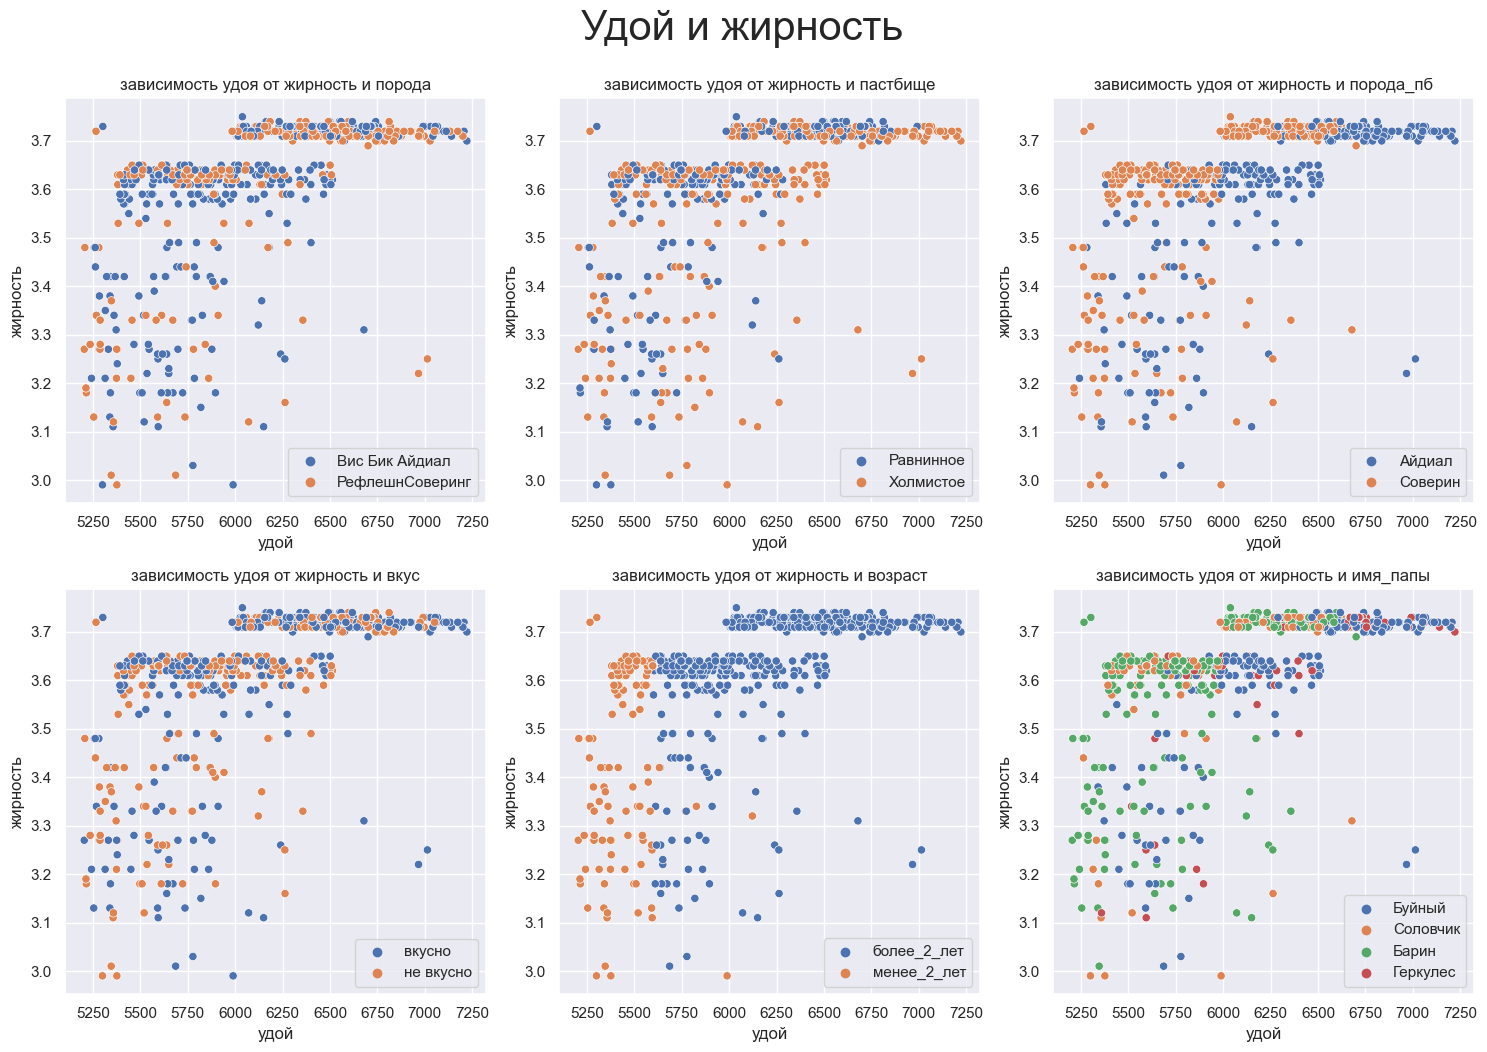

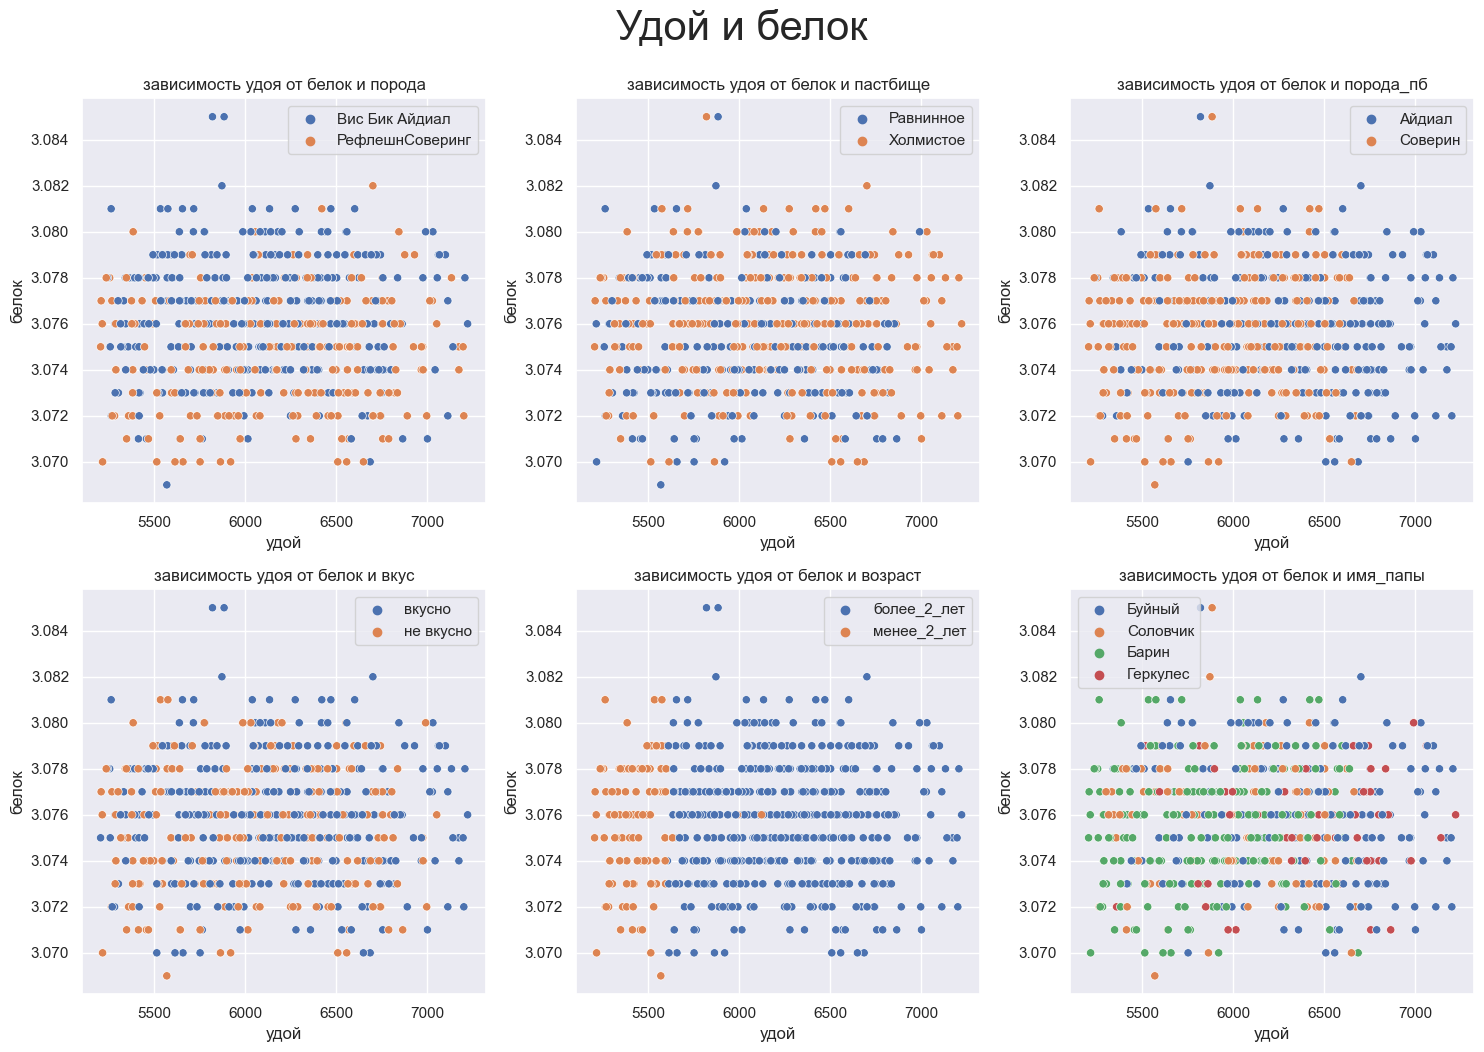

In [28]:
for i in ds_main_numeric[1:]: # Перебор всех числовых показателей(кроме удоя с нулевым индексом)
    fig, axs = plt.subplots(2, 3, figsize=(15, 10)) # Создание расположения сабплотов
    index = 0 # счётчик
    for j in ds_main_string: # Перебор всех категориальных значений, вызов функции с текущими значениями наблюдаемых признаков.
        scatter_plot_display(ds_main, 'удой', i, j, axs[index // 3, index % 3])
        index += 1
    plt.tight_layout()
    fig.suptitle(f'Удой и {ds_main[i].name}', y=1.05, fontsize=30)
    plt.show()

Отлично, мы выжили, а теперь к разбору полученных графиков. 

**Энергетическая кормовая единица**
- Первую закономерность можно увидеть на третьем сабплоте первого массива графиков - на высоких значениях ЭКЕ коровы, чей отец породы Айдиал, начинают приносить больше молока, чем коровы с отцом породы Соверин. 
- Дальше далеко идти не надо, на пятом сабплоте первого массива можно увидеть, что коровы старше 2 лет в среднем дают больше молока, но и кормят их лучше (Параметр ЭКЕ выше)
- Следующий, шестой сабплот, показывает, что рекордсменами по удою являются исключительно коровы, рождённые от быков Буйный и Геркулес, в это время Соловчик и Барин показывают результаты хуже.
- Все остальные категориальные признаки показывают равномерное распределение. Между ними нет четкой зависимости.
- При этом на всех графиках видна одна и та-же закономерность - чем выше ЭКЕ, тем выше удой

**Содержание протеина в корме**
- Точно так-же, коровы старше 2 лет дают больше молока, при этом их кормят б**о**льшим количеством протеина.
- Высокое содержание протеина в корме благополучно влияет на показатель удоя, но прямой зависимости между ними нет.

**СПО(Сахаро-протеиновое соотношение)**
- На графиках зависимости СПО можно заметить, что показатель, хоть и является числовым, по сути ближе к категориальному признаку из-за часто повторяющихся значений. Из-за этого график рассеяния испещрён ровными линиями.
- При этом видна чёткая закономерность - чем выше СПО, тем выше удой. 
- Из категориальных признаков на удой благополучно влияет возраст коровы, порода отца Айдиал и имя отца Буйный или Геркулес.

**Жирность молока**
- Высокие значения благополучно влияют на показатель удоя.
- Коровы породы Рефлешн-Соверинг, судя по всему, дают более жирное молоко.
- Пасущиеся на холмистых пастбищах коровы тоже дают более жирное молоко.
- Коровы старше 2 лет чаще дают более жирное молоко.

**Содержание белка в молоке**
- Подобно СПО, значения содержания белка часто повторяются, и по структуре немного схожи с категориальным признаком.
- Прослеживаются те-же зависимости с возрастом, породой и именем папы-быка, что и в предыдущих наборах графиков.

Подведём итоги по корреляционному анализу.

Большинство числовых признаков прямо влияют на показатель удоя, при этом возраст коровы старше 2 лет почти гарантирует высокий удой. Также прямо влияет на удой показатель жирности молока, ЭКЕ и СПО. В целом - между целевым признаком и входными присутствует прямая взаимосвязь.

Нелинейная взаимосвязь возможно имеет место быть между удоем и СПО. График показал слишком идеальную картину с корреляцией в 0.8.

Мультиколлениарность также присутствует, например между ЭКЕ и СПО прямая корреляция в 0.75, а между жирностью и ЭКЕ 0.64. Но это не те значения о которых стоило-бы беспокоиться, в рамках обучения моделей такая корреляция входных признаков не должна повлиять на результат.

## Обучение модели линейной регрессии

In [29]:
def lr_metrics(true, pred, bins=30): # Функция для вывода метрик для модели линейной регрессии и анализа остатков
    print(f'Коэффициент детерминации(R2): {r2_score(true, pred).round(5)}')
    print(f'Средний квадрат ошибки(MSE): {mean_squared_error(true, pred).round(2)}')
    print(f'Корень среднего квадрата ошибки(RMSE): {mean_squared_error(true, pred, squared=False).round(2)}')
    print(f'Средняя ошибка по модулю(MAE): {mean_absolute_error(true, pred).round(2)}')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    (true-pred).plot(kind='hist', ax=axes[0], title='Гистограмма распределения остатков', bins=bins)
    ymin, ymax = axes[0].get_ylim()
    axes[0].vlines(x=(true-pred).mean(), colors='red', ymin=ymin, ymax=ymax, label='Среднее')
    axes[0].vlines(x=(true-pred).median(), colors='red', ymin=ymin, ymax=ymax, linestyles='--', label='Медиана')
    axes[0].set_xlabel('Остаток')
    axes[0].legend()
    axes[1].scatter(y=pred, x=(true-pred))
    axes[1].set_title('Диаграмма рассеяния')
    axes[1].set_xlabel('Остаток')
    axes[1].set_ylabel('Предсказанное значение')

In [30]:
def numeric_string_kto_gde(ds): # Функция для сортировки названия столбцов на числовые и категориальные
    numeric = []
    string = []
    for i in ds.columns:
        if ds[i].dtype == 'O':
            string.append(i)
        elif i != 'удой':
            numeric.append(i)
    return numeric, string

In [31]:
def scale_and_encode(train, test): # Функция для масштабирования и кодирования входных данных при помощи StandardScaler и OneHotEncoder
    numeric, string = numeric_string_kto_gde(train)
    scaler = StandardScaler()
    encoder = OneHotEncoder(sparse=False, drop='first')
    train = (
    pd.DataFrame(
        scaler.fit_transform(train[numeric]), columns=numeric)).join(
    pd.DataFrame(
        encoder.fit_transform(train[string]), columns=encoder.get_feature_names()))
    test = (
         pd.DataFrame(
             scaler.transform(test[numeric]), columns=numeric)).join(
          pd.DataFrame(
             encoder.transform(test[string]), columns=encoder.get_feature_names()))
    return train, test

In [32]:
RANDOM_STATE = 42 # Константа определения случайных значений

### Первая модель прогнозирования удоя

Для начала отберём из датасета те признаки, которые будут полезны при обучении модели. Для первой модели возьмём признаки, прямо влияющие на целевой, а также те, что по логике должны иметь значение.
- Параметры корма - ЭКЕ, СПО и протеин, прямо влияют на показатель удоя, и это логично. 
- Жирность молока и содержание белка - параметры самого молока. Их мы использовать не будем.
- Из категориальных признаков на удой сильно повлиял возраст коровы. Также мы возьмём породу коровы и тип пастбища, как перспективные параметры, которые должны влиять на удой. Всеми остальными признаками при обучении первой модели мы пренебрежем.

#### Подготовка данных

In [33]:
data_lr_first = ds_main[['удой', 'эке', 'спо', 'протеин', 'возраст', 'пастбище', 'порода']] 
dlf_numeric, dlf_string = numeric_string_kto_gde(data_lr_first)
data_lr_first.head()

,удой,эке,спо,протеин,возраст,пастбище,порода
0,5863,14.2,0.890,1743,более_2_лет,Равнинное,Вис Бик Айдиал
1,5529,12.8,0.890,2138,менее_2_лет,Равнинное,Вис Бик Айдиал
2,5810,14.0,0.885,1854,более_2_лет,Холмистое,РефлешнСоверинг
3,5895,12.4,0.885,2012,более_2_лет,Холмистое,РефлешнСоверинг
4,5302,12.8,0.885,1675,менее_2_лет,Равнинное,Вис Бик Айдиал


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    data_lr_first.drop('удой', axis=1), 
    data_lr_first['удой'], 
    random_state = RANDOM_STATE) # Разбивка на выборки
X_train.head()

,эке,спо,протеин,возраст,пастбище,порода
508,16.5,0.94,2123,более_2_лет,Холмистое,РефлешнСоверинг
383,12.5,0.89,1889,менее_2_лет,Холмистое,РефлешнСоверинг
587,14.7,0.88,1671,более_2_лет,Равнинное,Вис Бик Айдиал
197,14.4,0.94,2063,более_2_лет,Холмистое,Вис Бик Айдиал
328,13.1,0.89,2077,более_2_лет,Равнинное,Вис Бик Айдиал


In [35]:
X_train, X_test = scale_and_encode(X_train, X_test) # Масштабирование и кодирование входных данных
display(X_train.head(), X_test.head())

,эке,спо,протеин,x0_менее_2_лет,x1_Холмистое,x2_РефлешнСоверинг
0,1.502378,0.837130,1.079523,0.0,1.0,1.0
1,-1.557270,-0.703660,-0.196920,1.0,1.0,1.0
2,0.125537,-1.011818,-1.386085,0.0,0.0,0.0
3,-0.103937,0.837130,0.752230,0.0,1.0,0.0
4,-1.098323,-0.703660,0.828598,0.0,0.0,0.0


,эке,спо,протеин,x0_менее_2_лет,x1_Холмистое,x2_РефлешнСоверинг
0,-0.486393,-1.011818,-0.813322,0.0,1.0,0.0
1,1.425887,0.837130,0.026730,0.0,1.0,1.0
2,-0.486393,-1.628134,-0.682405,1.0,1.0,1.0
3,-0.945340,-1.011818,-1.058792,0.0,0.0,0.0
4,0.584484,-0.703660,-1.413360,0.0,1.0,0.0


#### Обучение и оценка качества

In [36]:
model_lr_first = LinearRegression() # Объявление модели линейной регрессии

In [37]:
model_lr_first = model_lr_first.fit(X_train, y_train) # Обучение на тренировочных данных
y_pred = model_lr_first.predict(X_test) # Получение предсказаний на тестовых данных

Коэффициент детерминации(R2): 0.74796
Средний квадрат ошибки(MSE): 51305.95
Корень среднего квадрата ошибки(RMSE): 226.51
Средняя ошибка по модулю(MAE): 181.38


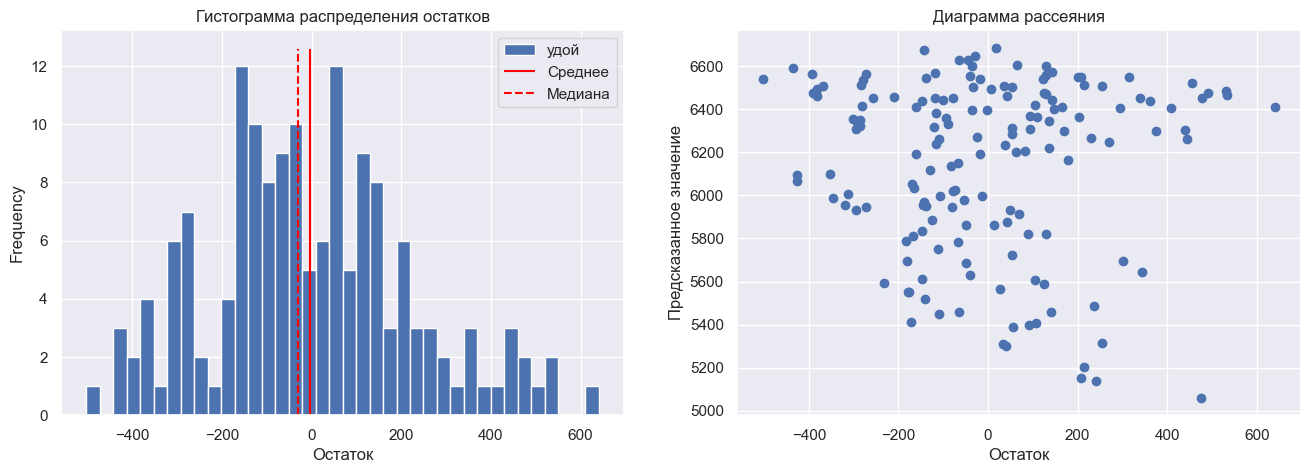

In [38]:
lr_metrics(y_test, y_pred, 38) # Вывод метрик

Распределение остатков похоже на нормальное, среднее и медиана сосредоточены вокруг нуля, сильных выбросов и аномалий нету. На диаграмме рассеяния видно, что при увеличении предсказанного значения разброс остатков увеличивается. Она начинает ошибаться сильнее и чаще, когда предсказывает высокие значения.

### Вторая модель прогнозирования удоя

#### Подготовка данных

Теперь мы возьмём только признаки, прямо влияющие на значение удоя.

In [39]:
data_lr_second = ds_main[['удой', 'спо', 'эке', 'возраст', 'порода_пб', 'протеин']]
data_lr_second.head()

,удой,спо,эке,возраст,порода_пб,протеин
0,5863,0.890,14.2,более_2_лет,Айдиал,1743
1,5529,0.890,12.8,менее_2_лет,Соверин,2138
2,5810,0.885,14.0,более_2_лет,Соверин,1854
3,5895,0.885,12.4,более_2_лет,Айдиал,2012
4,5302,0.885,12.8,менее_2_лет,Соверин,1675


Также нам необходимо исключить нелинейные связи между входными и целевым признаком. Начнём с СПО. На диаграмме рассеяния из корреляционного анализа мы обратили внимание на то, что показатели СПО распределены на 2 условные категории - низкий СПО с низким удоем и высокий СПО с высоким удоем. Чтобы модель линейной регрессии лучше поняла связь между этими двумя признаками - переведём параметр СПО в бинарный вид, где СПО выше 0.92 - это Высокое, а ниже - это Низкое.

In [40]:
data_lr_second.loc[data_lr_second['спо']>0.92, 'спо'] = 'Высокое'
data_lr_second.loc[data_lr_second['спо'] != 'Высокое', 'спо'] = 'Низкое'
data_lr_second.head(10)

,удой,спо,эке,возраст,порода_пб,протеин
0,5863,Низкое,14.2,более_2_лет,Айдиал,1743
1,5529,Низкое,12.8,менее_2_лет,Соверин,2138
2,5810,Низкое,14.0,более_2_лет,Соверин,1854
3,5895,Низкое,12.4,более_2_лет,Айдиал,2012
4,5302,Низкое,12.8,менее_2_лет,Соверин,1675
5,5254,Низкое,12.7,менее_2_лет,Соверин,1806
6,5910,Низкое,13.2,более_2_лет,Соверин,1792
7,6179,Высокое,14.7,более_2_лет,Айдиал,1806
8,6783,Высокое,14.2,более_2_лет,Айдиал,1918
9,5339,Низкое,13.4,менее_2_лет,Соверин,1791


Теперь, избавимся от нелинейной связи между удоем и ЭКЕ, возведя показатели энергетической кормовой единицы в квадрат

In [41]:
data_lr_second.loc[:, 'эке'] = data_lr_second.loc[:, 'эке']**2

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    data_lr_second.drop('удой', axis=1), 
    data_lr_second['удой'], 
    random_state = RANDOM_STATE)

In [43]:
X_train, X_test = scale_and_encode(X_train, X_test) # Масштабирование и кодирование входных данных
display(X_train.head(), X_test.head())

,эке,протеин,x0_Низкое,x1_менее_2_лет,x2_Соверин
0,1.577968,1.079523,0.0,0.0,1.0
1,-1.511438,-0.196920,1.0,1.0,1.0
2,0.082269,-1.386085,1.0,0.0,0.0
3,-0.150235,0.752230,0.0,0.0,0.0
4,-1.102358,0.828598,1.0,0.0,0.0


,эке,протеин,x0_Низкое,x1_менее_2_лет,x2_Соверин
0,-0.527089,-0.813322,1.0,0.0,0.0
1,1.490346,0.026730,0.0,0.0,1.0
2,-0.527089,-0.682405,1.0,1.0,1.0
3,-0.961737,-1.058792,1.0,0.0,1.0
4,0.561660,-1.413360,1.0,0.0,1.0


#### Обучение и оценка качества

In [44]:
model_lr_second = LinearRegression()

In [45]:
model_lr_second = model_lr_second.fit(X_train, y_train)
y_pred = model_lr_second.predict(X_test)

Коэффициент детерминации(R2): 0.8163
Средний квадрат ошибки(MSE): 37395.56
Корень среднего квадрата ошибки(RMSE): 193.38
Средняя ошибка по модулю(MAE): 149.85


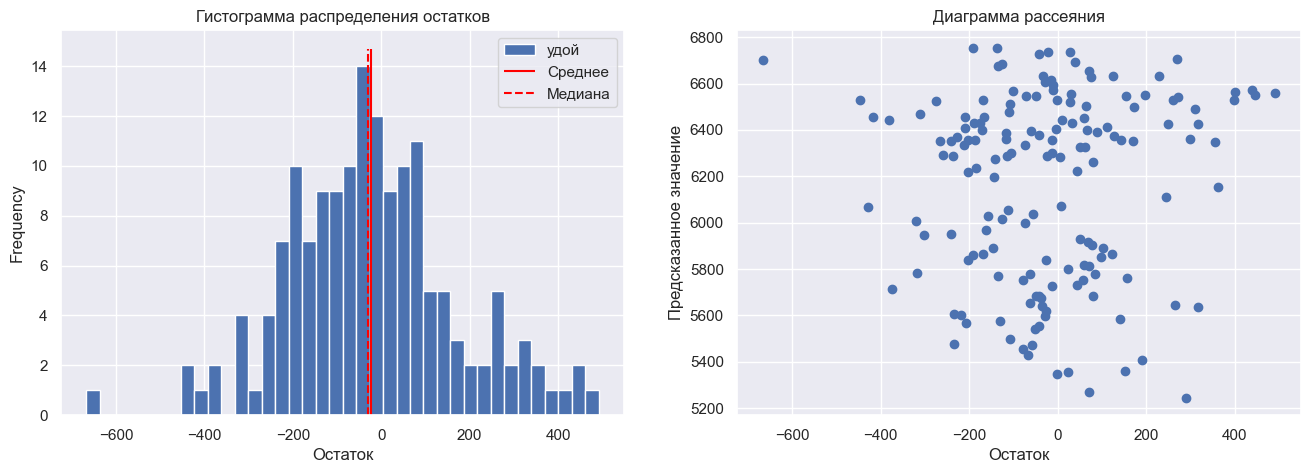

In [46]:
lr_metrics(y_test, y_pred, 38) # Вывод метрик

Коэффициент детерминации вырос на ~0.07, значит сухое качество модели возросло, и она стала выдавать более реалистичные прогнозы в сравнении с предыдущей моделью. Все метрики свидетельствуют о более хорошем качестве модели. Распределение остатков тоже улучшилось и стало более равномерным. Но при этом среднее значение остатков съехало влево. 

### Третья модель прогнозирования удоя

На этот раз мы возьмём данные второй модели, и добавим к ним параметр имени папы-быка. А затем посмотрим, что из этого получится.

#### Подготовка данных

In [47]:
data_lr_third = data_lr_second
data_lr_third['имя_папы'] = ds_main['имя_папы']
data_lr_third.head()

,удой,спо,эке,возраст,порода_пб,протеин,имя_папы
0,5863,Низкое,201.64,более_2_лет,Айдиал,1743,Буйный
1,5529,Низкое,163.84,менее_2_лет,Соверин,2138,Соловчик
2,5810,Низкое,196.00,более_2_лет,Соверин,1854,Барин
3,5895,Низкое,153.76,более_2_лет,Айдиал,2012,Буйный
4,5302,Низкое,163.84,менее_2_лет,Соверин,1675,Барин


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    data_lr_third.drop('удой', axis=1), 
    data_lr_third['удой'], 
    random_state = RANDOM_STATE)
X_train.head()

,спо,эке,возраст,порода_пб,протеин,имя_папы
508,Высокое,272.25,более_2_лет,Соверин,2123,Соловчик
383,Низкое,156.25,менее_2_лет,Соверин,1889,Барин
587,Низкое,216.09,более_2_лет,Айдиал,1671,Буйный
197,Высокое,207.36,более_2_лет,Айдиал,2063,Буйный
328,Низкое,171.61,более_2_лет,Айдиал,2077,Геркулес


In [49]:
X_train, X_test = scale_and_encode(X_train, X_test) # Масштабирование и кодирование входных данных
display(X_train.head(), X_test.head())

,эке,протеин,x0_Низкое,x1_менее_2_лет,x2_Соверин,x3_Буйный,x3_Геркулес,x3_Соловчик
0,1.577968,1.079523,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.511438,-0.196920,1.0,1.0,1.0,0.0,0.0,0.0
2,0.082269,-1.386085,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.150235,0.752230,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.102358,0.828598,1.0,0.0,0.0,0.0,1.0,0.0


,эке,протеин,x0_Низкое,x1_менее_2_лет,x2_Соверин,x3_Буйный,x3_Геркулес,x3_Соловчик
0,-0.527089,-0.813322,1.0,0.0,0.0,0.0,1.0,0.0
1,1.490346,0.026730,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.527089,-0.682405,1.0,1.0,1.0,0.0,0.0,0.0
3,-0.961737,-1.058792,1.0,0.0,1.0,0.0,0.0,0.0
4,0.561660,-1.413360,1.0,0.0,1.0,0.0,0.0,0.0


#### Обучение и оценка качества

In [50]:
model_lr_third = LinearRegression()

In [51]:
model_lr_third = model_lr_third.fit(X_train, y_train)
y_pred = model_lr_third.predict(X_test)

Коэффициент детерминации(R2): 0.8188
Средний квадрат ошибки(MSE): 36884.96
Корень среднего квадрата ошибки(RMSE): 192.05
Средняя ошибка по модулю(MAE): 148.16


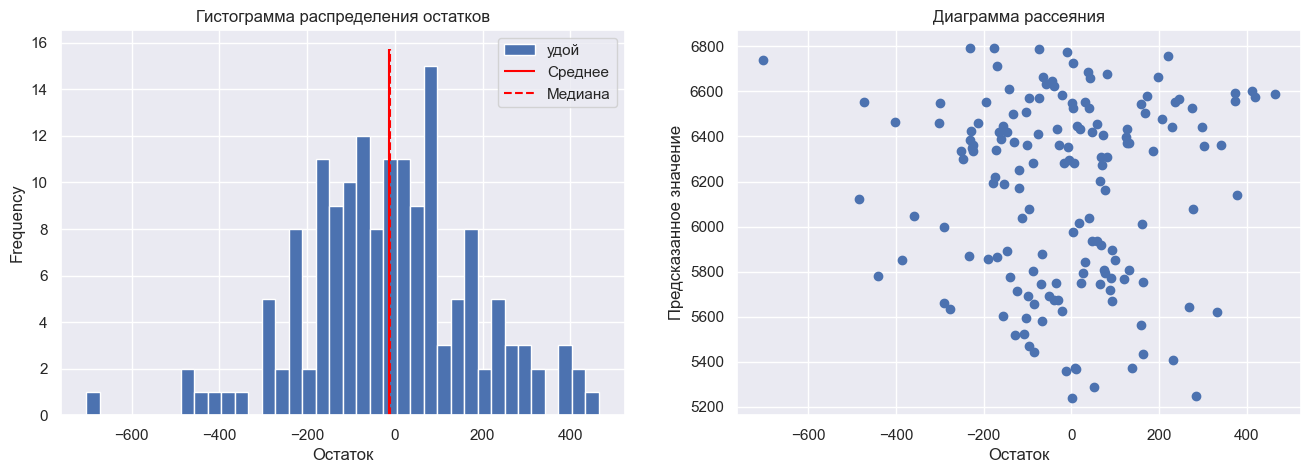

In [52]:
lr_metrics(y_test, y_pred, 38)

Коэффициент детерминации вырос незначительно(на ~0.002), метрики MSE, RMSE и MAE незначительно упали. Модель стала предсказывать лучше, но не намного. 

### Выбор лучшей модели

Все метрики и графики указывают на то, что лучший выбор для нас - модель под номером три, с исключенными нелинейными связями входных данных, и параметром имён пап-быков. Поздравим победителя. Теперь рассчитаем доверительный интервал для этой модели. Это будет диапазон значений, в которые почти наверняка будет попадать значение остатка. За уровень доверия возьмём 95%.

In [53]:
print(f'Нижний лимит, квантиль 2.5%: {np.quantile(y_test-y_pred, 0.025).round(2)}')
print(f'Верхний лимит, квантиль 97.5%: {np.quantile(y_test-y_pred, 0.975).round(2)}')

Нижний лимит, квантиль 2.5%: -405.35
Верхний лимит, квантиль 97.5%: 374.57


Итого мы получаем, что около 95% спрогнозированных значений будут иметь ошибку в диапазоне от -405 до 374 кг.

In [54]:
print(f'При прогнозе {y_pred.mean().round(2)}, истинное значение может быть в интервале от {(y_pred.mean()+np.quantile(y_test-y_pred, 0.025)).round(2)} до {(y_pred.mean()+np.quantile(y_test-y_pred, 0.975)).round(2)}')

При прогнозе 6155.98, истинное значение может быть в интервале от 5750.64 до 6530.55


### Прогнозирование целевого признака

Теперь сделаем то, зачем мы здесь и собрались - предскажем значения удоя у коров, которых фермер хочет купить. Для этого нам необходимо привести датасет в такой-же вид, что и тренировочный.

#### Подготовка данных

In [55]:
dataset_info(ds_buy, False)

Количество дубликатов: 4
Длина датасета: 20


,порода,пастбище,порода_пб,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Не хватает параметров ЭКЕ, СПО и протеин. В любом случае при покупке фермер будет кормить их по-своему, и при этом он собирается повысить новоприобретенным коровам показатели корма на 5%. Возьмём средние значения из стада фермера и повысим на 5%. Неиспользованные при обучении данные уберём, они нам не пригодятся.

In [56]:
for i in ['эке', 'спо', 'протеин']: # Перебор значений, взятие среднего + 5% для всех записей
    ds_buy[i] = ds_main[i].mean()+(ds_main[i].mean()*0.05)
ds_buy_lr = ds_buy[['спо', 'эке', 'возраст', 'порода_пб', 'протеин', 'имя_папы']]
ds_buy_lr['эке'] = ds_buy_lr['эке']**2 # ЭКЕ возводится в квадрат
ds_buy_lr.head()

,спо,эке,возраст,порода_пб,протеин,имя_папы
0,0.958744,233.361138,более_2_лет,Айдиал,2019.947532,Геркулес
1,0.958744,233.361138,менее_2_лет,Соверин,2019.947532,Буйный
2,0.958744,233.361138,более_2_лет,Соверин,2019.947532,Барин
3,0.958744,233.361138,более_2_лет,Айдиал,2019.947532,Буйный
4,0.958744,233.361138,более_2_лет,Айдиал,2019.947532,Буйный


Все значения СПО выше 0.92 - можно заменить весь этот столбец на 'Высокое'

In [57]:
ds_buy_lr['спо'] = 'Высокое'

In [58]:
X_train, X_test, y_train, y_test = train_test_split( # Получение тренировочной выборки третьей модели для повторного обучения кодировщика и скейлера
    data_lr_third.drop('удой', axis=1), 
    data_lr_third['удой'], 
    random_state = RANDOM_STATE)

X_train, ds_buy_lr = scale_and_encode(X_train, ds_buy_lr)
ds_buy_lr.head()

,эке,протеин,x0_Низкое,x1_менее_2_лет,x2_Соверин,x3_Буйный,x3_Геркулес,x3_Соловчик
0,0.542248,0.517384,0.0,0.0,0.0,0.0,1.0,0.0
1,0.542248,0.517384,0.0,1.0,1.0,1.0,0.0,0.0
2,0.542248,0.517384,0.0,0.0,1.0,0.0,0.0,0.0
3,0.542248,0.517384,0.0,0.0,0.0,1.0,0.0,0.0
4,0.542248,0.517384,0.0,0.0,0.0,1.0,0.0,0.0


#### Прогнозирование

А теперь - финальный штрих. Получение предсказаний модели. Загрузим в него обработанные данные и получим чистейшие значения удоя.

In [59]:
ds_buy['удой'] = model_lr_third.predict(ds_buy_lr)
ds_buy.head()

,порода,пастбище,порода_пб,имя_папы,жирность,белок,возраст,эке,спо,протеин,удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,6579.043176
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,0.958744,2019.947532,6402.182546
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.958744,2019.947532,6311.652630
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,0.958744,2019.947532,6565.647345
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,0.958744,2019.947532,6565.647345


Сразу можем выбрать коров, которые подходят фермеру по значению удоя. Модель работает не идеально, и то и дело ошибается, поэтому вспоминаем доверительный интервал, до границы в 6000 кг нижней границе доверительного интервала среднего предсказания не хватает ~250 кг. Добавим их к изначальному критерию.

In [60]:
ds_buy = ds_buy[ds_buy['удой']>6250]
dataset_info(ds_buy, False)

Количество дубликатов: 4
Длина датасета: 19


,порода,пастбище,порода_пб,имя_папы,жирность,белок,возраст,эке,спо,протеин,удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,6579.043176
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,0.958744,2019.947532,6402.182546
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.958744,2019.947532,6311.652630
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,0.958744,2019.947532,6565.647345
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,0.958744,2019.947532,6565.647345


На этом работа модели линейной регрессии подошла к концу, и начинается работа модели логистической регрессии. Фермер не потерпит, если мы посоветуем ему коров с невкусным молоком. Узнаем какие из оставшихся дадут вкусное молоко.

## Обучение модели логистической регрессии

Модель логистической регрессии поможет нам присвоить каждой корове бинарную категорию - даёт она вкусное молоко, или нет. За целевой признак мы, соответственно, возьмём `вкус`.

### Подготовка данных

Для начала возьмём показатели, имеющие хоть какую-то линейную связь со вкусом молока. Далее, избавимся от нелинейных связей имеющихся параметров - точно так-же, как мы делали в линейной регрессии.

In [61]:
data_logr = ds_main[['порода', 'пастбище', 'имя_папы', 'жирность', 'белок', 'эке', 'спо', 'вкус']]
data_logr['пастбище'] = data_logr['пастбище'].str.lower()
data_logr.loc[data_logr['спо']>0.92, 'спо'] = 'Высокое'
data_logr.loc[data_logr['спо'] != 'Высокое', 'спо'] = 'Низкое'
data_logr['эке'] = data_logr['эке']**2
data_logr.head()

,порода,пастбище,имя_папы,жирность,белок,эке,спо,вкус
0,Вис Бик Айдиал,равнинное,Буйный,3.58,3.076,201.64,Низкое,вкусно
1,Вис Бик Айдиал,равнинное,Соловчик,3.54,3.079,163.84,Низкое,вкусно
2,РефлешнСоверинг,холмистое,Барин,3.59,3.074,196.00,Низкое,не вкусно
3,РефлешнСоверинг,холмистое,Буйный,3.40,3.075,153.76,Низкое,не вкусно
4,Вис Бик Айдиал,равнинное,Барин,3.73,3.073,163.84,Низкое,вкусно


Вкус - бинарный признак, у него всего два значения. Переименуем значение вкусно в единицу, а не вкусно в ноль.

In [62]:
data_logr.loc[data_logr['вкус'] == 'вкусно', 'вкус'] = 1
data_logr.loc[data_logr['вкус'] == 'не вкусно', 'вкус'] = 0
data_logr['вкус'] = pd.to_numeric(data_logr['вкус'])
data_logr.head()

,порода,пастбище,имя_папы,жирность,белок,эке,спо,вкус
0,Вис Бик Айдиал,равнинное,Буйный,3.58,3.076,201.64,Низкое,1
1,Вис Бик Айдиал,равнинное,Соловчик,3.54,3.079,163.84,Низкое,1
2,РефлешнСоверинг,холмистое,Барин,3.59,3.074,196.00,Низкое,0
3,РефлешнСоверинг,холмистое,Буйный,3.40,3.075,153.76,Низкое,0
4,Вис Бик Айдиал,равнинное,Барин,3.73,3.073,163.84,Низкое,1


Теперь разделим данные на выборки.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    data_logr.drop('вкус', axis=1), 
    data_logr['вкус'], 
    random_state=RANDOM_STATE)
X_train.head()

,порода,пастбище,имя_папы,жирность,белок,эке,спо
508,РефлешнСоверинг,холмистое,Соловчик,3.70,3.074,272.25,Высокое
383,РефлешнСоверинг,холмистое,Барин,3.34,3.072,156.25,Низкое
587,Вис Бик Айдиал,равнинное,Буйный,3.18,3.079,216.09,Низкое
197,Вис Бик Айдиал,холмистое,Буйный,3.62,3.079,207.36,Высокое
328,Вис Бик Айдиал,равнинное,Геркулес,3.64,3.076,171.61,Низкое


Используем фунцию, оставшуюся после линейной регрессии, для масштабирования и кодирования данных.

In [64]:
X_train, X_test = scale_and_encode(X_train, X_test)
X_train.head()

,жирность,белок,эке,x0_РефлешнСоверинг,x1_холмистое,x2_Буйный,x2_Геркулес,x2_Соловчик,x3_Низкое
0,0.562532,-0.679069,1.577968,1.0,1.0,0.0,0.0,1.0,0.0
1,-1.601817,-1.452568,-1.511438,1.0,1.0,0.0,0.0,0.0,1.0
2,-2.563750,1.254677,0.082269,0.0,0.0,1.0,0.0,0.0,1.0
3,0.081565,1.254677,-0.150235,0.0,1.0,1.0,0.0,0.0,0.0
4,0.201807,0.094429,-1.102358,0.0,0.0,0.0,1.0,0.0,1.0


### Обучение и оценка качества

И можно получать предсказания. И сразу-же - рассчитывать новые метрики

In [65]:
model_logr = LogisticRegression()
model_logr = model_logr.fit(X_train, y_train)
y_pred = model_logr.predict(X_test)

In [66]:
def logr_metrics(test, pred): # Функция для вывода метрик модели логистической регрессии
    print(f'Accuracy: {accuracy_score(test, pred).round(3)}')
    print(f'Precision: {precision_score(test, pred).round(3)}')
    print(f'Recall: {recall_score(test, pred).round(3)}')
    sns.heatmap(confusion_matrix(test, pred), cmap='coolwarm', annot=True)
    plt.ylabel('Истинные значения')
    plt.xlabel('Предсказанные значения');

Accuracy: 0.643
Precision: 0.631
Recall: 0.875


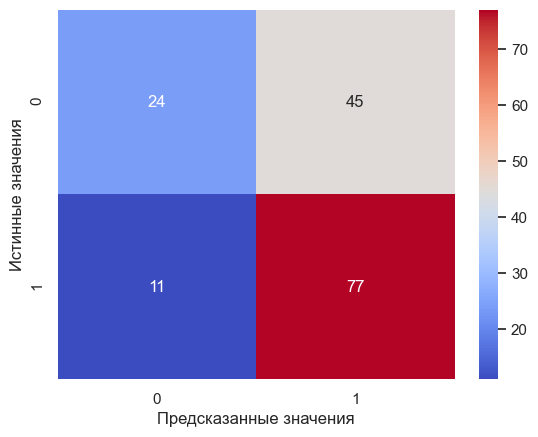

In [67]:
logr_metrics(y_test, y_pred)

64% правильных ответов. Это немного лучше, чем выбирать случайные значения. Кажется, имеющиеся у нас признаки не сильно коррелируют со вкусом молока, но будем довольствоваться тем, что имеем. Фермеру важно купить только коров, дающих вкусное молоко, значит нам необходимо минимизировать ошибки первого рода - ложноположительные ответы.

### Поиск порога классификации

In [68]:
proba = pd.DataFrame()
proba['valid'] = y_test
proba['proba'] = model_logr.predict_proba(X_test)[:, 1]
thresholds = [round(i,2) for i in np.linspace(0.74,0.84,num = 10,endpoint=False)]

for i in thresholds:
    proba['pred_'+str(i)] = proba['proba'].apply(lambda x: 0 if x<=i else 1)
proba.head()

,valid,proba,pred_0.74,pred_0.75,pred_0.76,pred_0.77,pred_0.78,pred_0.79,pred_0.8,pred_0.81,pred_0.82,pred_0.83
582,1,0.674489,0,0,0,0,0,0,0,0,0,0
592,1,0.699546,0,0,0,0,0,0,0,0,0,0
551,1,0.699299,0,0,0,0,0,0,0,0,0,0
214,0,0.439046,0,0,0,0,0,0,0,0,0,0
486,1,0.816473,1,1,1,1,1,1,1,1,0,0


In [69]:
for i in proba.columns:
    if i != 'valid' and i != 'proba':
        print(f'Precision {i}\t:\t{precision_score(proba["valid"], proba[i]).round(1)}')

Precision pred_0.74	:	0.8
Precision pred_0.75	:	0.8
Precision pred_0.76	:	0.8
Precision pred_0.77	:	0.8
Precision pred_0.78	:	0.9
Precision pred_0.79	:	0.9
Precision pred_0.8	:	0.9
Precision pred_0.81	:	0.9
Precision pred_0.82	:	1.0
Precision pred_0.83	:	1.0


0.82 - минимальный порог для классификации, при котором абсолютно все положительные предсказания истинны.

Accuracy: 0.465
Precision: 1.0
Recall: 0.045


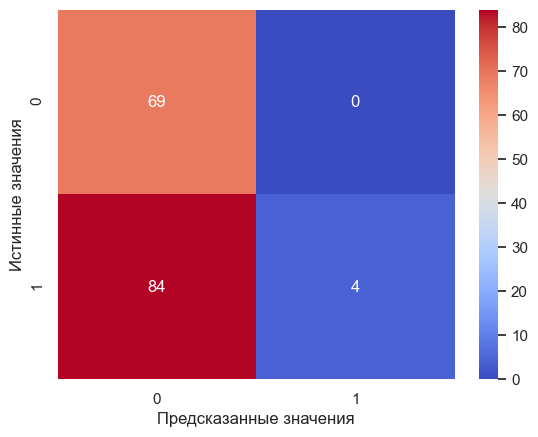

In [70]:
logr_metrics(y_test, proba['pred_0.82'])

Хоть общее качество модели выглядит не очень презентабельно, у нас получилось свести ложноположительные ответы к нулю. При пороге классификации в 0.82, все положительные ответы на тестовой выборке - истинно положительные.

### Прогнозирование целевого признака

Теперь спрогнозируем вероятности для `ds_buy`. Для этого придётся провести подготовку данных.

In [71]:
ds_buy_logr = ds_buy[['жирность', 'белок', 'эке', 'порода', 'пастбище', 'имя_папы', 'спо']]
ds_buy_logr['эке'] = ds_buy_logr['эке']**2
ds_buy_logr['спо'] = 'Высокое'
ds_buy_logr.head()

,жирность,белок,эке,порода,пастбище,имя_папы,спо
0,3.58,3.076,233.361138,Вис Бик Айдиал,холмистое,Геркулес,Высокое
1,3.54,3.081,233.361138,Вис Бик Айдиал,равнинное,Буйный,Высокое
2,3.59,3.074,233.361138,РефлешнСоверинг,равнинное,Барин,Высокое
3,3.40,3.061,233.361138,РефлешнСоверинг,холмистое,Буйный,Высокое
4,3.64,3.074,233.361138,РефлешнСоверинг,равнинное,Буйный,Высокое


In [72]:
X_train, X_test, y_train, y_test = train_test_split( # Получаем тренировочную выборку для обучения энкодера и скейлера
    data_logr.drop('вкус', axis=1), 
    data_logr['вкус'], 
    random_state=RANDOM_STATE)

X_train, ds_buy_logr = scale_and_encode(X_train, ds_buy_logr)
ds_buy_logr.head()

,жирность,белок,эке,x0_РефлешнСоверинг,x1_холмистое,x2_Буйный,x2_Геркулес,x2_Соловчик,x3_Низкое
0,-0.158918,0.094429,0.542248,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.399401,2.028176,0.542248,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.098797,-0.679069,0.542248,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.241093,-5.706810,0.542248,1.0,1.0,1.0,0.0,0.0,0.0
4,0.201807,-0.679069,0.542248,1.0,0.0,1.0,0.0,0.0,0.0


In [73]:
model_logr.coef_ # Выводим коэффициенты для сравнения влияния показателей на результаты работы модели.

array([[ 0.01462192,  0.30039002,  0.65277406,  0.061157  ,  0.51088462,
        -0.04999783, -0.05512437, -0.37230873,  0.60195331]])

Данные готовы. Попросим нашу модель предсказать вероятности того, что молоко окажется вкусным.

In [74]:
ds_buy['вкус'] = model_logr.predict_proba(ds_buy_logr)[:, 1].round(2)
ds_buy.sort_values(by = 'вкус', ascending=False).head()

,порода,пастбище,порода_пб,имя_папы,жирность,белок,возраст,эке,спо,протеин,удой,вкус
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,0.958744,2019.947532,6369.682605,0.77
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,0.958744,2019.947532,6402.182546,0.71
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,0.958744,2019.947532,6323.514931,0.70
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,6579.043176,0.69
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,6579.043176,0.69


Ни одной вероятности выше порога классификации в 82%. Возможно это что-то говорит о коровах Экофермы, или о качестве модели. Возьмём 3 записи с самыми большими вероятностями - 9, 1 и 16. На этом работа логистической регрессии подошла к концу, оба целевых признака спрогнозированы, и на их основе отобраны подходящие по критериям записи.

## Итоговые выводы

**Предобработка**

- Переименованы столбцы
- Выполнена проверка на явные дубликаты
- Совмещены связанные датасеты
- Преобразованы типы данных

**Исследовательский анализ**

- Проверено распределение значений
- Удалены аномальные записи
- Удалены неявные дубликаты значений

**Корреляционный анализ**

- Построена матрица корреляции для числовых значений, выявлена взаимосвязь между числовыми показателями.
- Построены диаграммы рессеяния, выявлена взаимосвязь между числовыми и строковыми показателями.

**Обучение модели линейной регрессии**

- Были обучены 3 модели, на разных наборах показателей.
- Из всех моделей была выбрана лучшая, учитывая метрики R2, MSE, RMSE, MAE и исходя из анализа остатков.
- Установлена граница доверительного интервала, с уровнем доверия 95% ошибка модели будет в диапазоне от -398 до 372 кг.
- Спрогнозирован целевой признак и отобраны 19 подходящих по критерию записей - не менее 6000 кг удоя в год. (плюс 250 кг для гарантии превышения нижней границы доверительного интервала)

**Обучение модели логистической регрессии**

- Была построена одна модель, с набором входных признаков, имеющих видимую взаимосвязь с целевым признаком.
- Рассчитаны метрики Accuracy, Precision и Recall.
- Определён приоритет избегания ошибок первого рода - ложноположительных прогнозов.
- На основе нового приоритета подобран минимальный порог классификации, при котором количество ложноположительных ответов на тестовой выборке равно нулю - 0.82.
- Спрогнозированы вероятности классификации, отобраны 3 записи с наибольшей вероятностью.

**Рекомендации заказчику**

- Произвести покупку коров, соответствующих критериям фермера на основе прогнозов МО - с индексами 9, 1 и 16.
- Ввести в базу данных больше параметров, прямо влияющих на удой и вкус молока. Это поспособствует более точному обучению моделей и, соответственно, получению более точных результатов.
- Выявить причину возникновения дубликатов в датасете `ferma_main.csv` и `cow_buy.csv`

**Методы улучшения регрессионных моделей**

В рамках этой задачи были использованы следующие методы улучшения работы моделей:
- Отбор признаков, прямо влияющих на целевой
- Устранение нелинейной связи между входными признаками и целевым.
- Кодирование и масштабирование входных данных

Улучшить работы регрессионных моделей также можно:
- Добавив больше признаков, имеющих линейную взаимосвязь с целевым признаком
- Использовав для обучения более крупную выборку.

При анализе рисков с использованием модели логистической регрессии важны следующие метрики:
- Матрица ошибок, как наиболее наглядная презентация результата работы модели
- Accuracy, как сухой показатель доли правильных ответов
- Precision, если наибольший приоритет у исключения ошибок первого рода - ложноположительных ответов.
- Recall, если наибольший приоритет у исключения ошибок второго рода - ложноотрицательных ответов.